# Module 4 Code Challenge

This code challenge is designed to test your understanding of the Module 4 material. It covers:

* Principal Component Analysis
* Clustering
* Time Series
* Natural Language Processing

_Read the instructions carefully._ You will be asked both to write code and respond to a few short answer questions.

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts is more important than getting the best model. You can use any libraries you want to solve the problems in the assessment. 

### Note on the short answer questions

For the short answer questions, _please use your own words._ The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

---

## Part 1: Principal Component Analysis [Suggested Time: 15 minutes]

---

In the first part of the code challenge, you'll apply the unsupervised learning technique of Principal Component Analysis to the wine dataset. 

We load the wine dataset for you in the cell below. 

In [1]:
# Run this cell without changes

# Relevant imports
import pandas as pd
import warnings
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supress warnings
warnings.simplefilter("ignore")

# Load data
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'class'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler_1 = StandardScaler()
X_train_scaled = pd.DataFrame(scaler_1.fit_transform(X_train), columns=X_train.columns)

# Inspect the first five rows of the scaled dataset
X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.628447,1.081206,-0.652127,0.000000,-0.841477,-1.003358,-1.517062,1.711448,-1.230771,0.333174,-0.641378,-1.070901,-0.518219
1,-0.540882,-0.612994,-1.427534,0.288180,-1.037487,-0.112585,-0.086751,-0.350476,-0.195036,-0.933495,0.346530,1.330768,-0.215063
2,-0.755657,-1.287031,-1.538306,-1.354445,2.294697,-0.573329,-0.156280,-0.112562,2.014532,-0.722384,0.432435,-0.398434,0.041960
3,0.377877,-0.694972,1.747940,-1.152719,0.595936,0.501741,0.668135,-0.191866,-0.402183,-0.171658,0.561293,0.246586,0.470333
4,-0.803385,0.388952,-0.541355,-0.432270,-0.841477,0.271369,0.241029,-0.905609,0.685339,-1.296056,0.819008,0.960225,-1.473819


### 1.1) Fit PCA to the training data

Call the PCA instance you'll create `wine_pca`. Set `n_components=0.9` and make sure to use `random_state = 42`.

_Make sure you are using the **preprocessed data!**_

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .9, random_state=42)
wine_pca = pca.fit_transform(X)

### 1.2) How many principal components are there in the fitted PCA object?

_Hint: Look at the list of attributes of trained `PCA` objects in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)_

In [3]:
len(pca.components_)

1

### 1.3) Is PCA more useful or less useful when you have high multicollinearity among your features? Explain why.

When dealing with a dataset that has high multicollinearity among features, using Principle Component Analysis(PCA)caste your data from a high dimensionality to a low dimensionality to help understand the variance our data causes. It summarizes the data in such a way that it explains what combination of variables explains the most variance about the data. 

--- 

## Part 2: Clustering [Suggested Time: 20 minutes]

---

This second part of the code challenge is meant to test your clustering knowledge.

* If the gif doesn't run, you may access it via [this link](images/centroid.gif).

<img src='images/centroid.gif'>

### 2.1) Using the gif above for reference, describe the steps of the k-means clustering algorithm.

1. Randomly assign x cluster centers or centroids. There are 4 centroids in the gif above
2. Calculate the distance between each point and the centroids. These are shown by the red lines in the gif.
3. Assign the data points to the cluster whose distance from the centroid is the minimum distance of all the possible clusters.
4. Reassign the centroid to a new position based on the points assigned to them.
5. Repeat steps # 2, 3, and 4 until the centroid can no longer be updated. 

Now let's use the wine dataset again, this time for clustering.

You will use scikit-learn to fit k-means clustering models, and you will determine the optimal number of clusters to use by looking at silhouette scores. 

### 2.2) Write a function called `get_labels()` that will find `k` clusters in a dataset of features `X`, and return the labels for each row of `X`. 

Review the doc-string in the function below to understand the requirements of this function.

_Hint: Within the function, you'll need to:_
* instantiate a k-means clustering model (use `random_state = 1` for reproducibility),
* fit the model to the data, and
* return the labels for each point 

In [4]:
# Replace None with appropriate code

# Relevant import(s) here
from sklearn.cluster import KMeans

def get_labels(k, X):
    """ 
    Finds the labels from a k-means clustering model 
    
    Parameters: 
    -----------
    k: float object
        number of clusters to use in the k-means clustering model
    X: Pandas DataFrame or array-like object
        Data to cluster
    
    Returns: 
    --------
    labels: array-like object
        Labels attribute from the k-means model
    
    """
    
    # Instantiate a k-means clustering model with random_state=1 and n_clusters=k
    kmeans = KMeans(random_state=1, n_clusters=2)
    
    # Fit the model to the data
    kmeans.fit(X,y)
    
    # Return the predicted labels for each row in the data produced by the model
    return kmeans.labels_

In the cell below we fit the k-means algorithm to the wine data for $k$ values in the range 2 to 9 using the function you've written above. Then we obtain the silhouette scores for each trained k-means clustering model, and place the values in a list called `silhouette_scores`.

In [5]:
# Run this cell without changes

from sklearn.metrics import silhouette_score

# Preprocessing is needed. Scale the data
scaler_2 = StandardScaler()
X_scaled = scaler_2.fit_transform(X)

# Create empty list for silhouette scores
silhouette_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    labels = get_labels(k, X_scaled)
    score = silhouette_score(X_scaled, labels, metric='euclidean')
    silhouette_scores.append(score)

Next, we plot the silhouette scores obtained for each different value of $k$, against $k$, the number of clusters we asked the algorithm to find. 

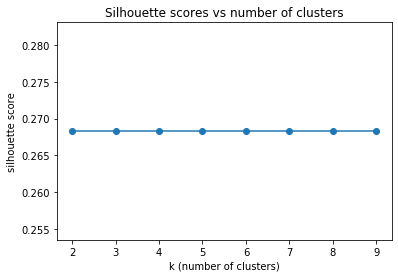

In [6]:
# Run this cell without changes

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score');

### 2.3) Which value of $k$ would you choose based on the above plot of silhouette scores? How does this number compare to the number of classes in the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)?

Hint: this number should be <= 5. If it's not, check the function written for Question 2.2.

The silhouette score explains how similar a value is to its own cluster. The score is calculated on a range of -1 to 1 and the higher the score is the more the value 'belongs' to that specified cluster. 

---

## Part 3: Natural Language Processing [Suggested Time: 20 minutes]

---

In this third section we will attempt to classify text messages as "SPAM" or "HAM" using TF-IDF Vectorization. Once we successfully classify our texts we will consider how to interpret the vectorization.

Complete the functions below and answer the question at the end. 

In [7]:
# Run this cell without changes

# Import necessary libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
# nltk.download('stopwords') # un-comment this if you get an error from nltk

In [39]:
# Run this cell without changes

# Read in data
df_messages = pd.read_csv('data/spam.csv', usecols=[0,1])

# Convert string labels to 1 or 0 
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

# Examine our data
df_messages.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
# Run this cell without changes

# Separate features and labels 
X = df_messages['v2']
y = df_messages['target']

# Generate a list of stopwords 
stopwords_list = stopwords.words('english') + list(string.punctuation)

### 3.1) Create a function that takes in our various texts along with their respective labels and uses TF-IDF to vectorize the texts.

- Review the doc-string in the function below to understand the requirements of this function.
- Recall that TF-IDF helps us "vectorize" text (turn text into numbers) so we can do "math" with it.  It is used to quantify how relevant a term is in a given document.
- **DO NOT** perform tokenization, removal of stop words, or TF-IDF vectorization "by hand".  Use `sklearn`'s `TfidfVectorizer`.

In [41]:
# Replace "pass" with appropriate code

def tfidf(X, y, stopwords_list): 
    """
    Generate train and test TF-IDF vectorization for our data set
    
    Parameters
    ----------
    X: pandas.Series object
        Pandas series of text documents to classify 
    y : pandas.Series object
        Pandas series containing label for each document
    stopwords_list: list ojbect
        List containing words and punctuation to remove. 
    Returns
    --------
    tf_idf_train :  sparse matrix, [n_train_samples, n_features]
        Vector representation of train data
    tf_idf_test :  sparse matrix, [n_test_samples, n_features]
        Vector representation of test data
    y_train : array-like object
        labels for training data
    y_test : array-like object
        labels for testing data
    vectorizer : vectorizer object
        fit TF-IDF vectorizer object

    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    pass

In [42]:
# Run this cell without changes
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

TypeError: 'NoneType' object is not iterable

### 3.2) Complete the function below to return a list of predictions for our training set and a separate list of predictions for our test set.

Now that we have a set of vectorized training data we can use this data to train a _classifier_ to learn how to classify a specific text based on the vectorized version of the text. Below we have initialized a simple Naive Bayes Classifier and Random Forest Classifier. 

Review the doc-string in the function below to understand the requirements of this function. The function should accept a classifier object, a vectorized training set, vectorized test set, and a list of training labels to return separate lists of predictions for the training and the test sets.

In [43]:
# Run this cell without changes
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [44]:
# Replace None with appropriate code

def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    """
    Train a classifier to identify whether a message is spam or ham
    
    Parameters
    ----------
    classifier: sklearn classifier
       initialized sklearn classifier (MultinomialNB, RandomForestClassifier, etc.)
    tf_idf_train : sparse matrix, [n_train_samples, n_features]
        TF-IDF vectorization of train data
    tf_idf_test : sparse matrix, [n_test_samples, n_features]
        TF-IDF vectorization of test data
    y_train : pandas.Series object
        Pandas series containing label for each document in the train set
    Returns
    --------
    train_preds :  list object
        Predictions for train data
    test_preds :  list object
        Predictions for test data
    """
    # Fit the classifier with our training data
    None
    
    # Predict the labels of our train data and store them in train_preds
    None
    
    # Predict the labels of our test data and store them in test_preds
    None
    
    return train_preds, test_preds

Generate and evaluate predictions for Naive Bayes Classifier

In [45]:
# Run this cell without changes

nb_train_preds, nb_test_preds = classify_text(nb_classifier, tf_idf_train, tf_idf_test, y_train)

print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))

NameError: name 'tf_idf_train' is not defined

Generate and evaluate predictions for Random Forest Classifier

In [46]:
# Run this cell without changes

rf_train_preds, rf_test_preds = classify_text(rf_classifier, tf_idf_train, tf_idf_test, y_train)

print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

NameError: name 'tf_idf_train' is not defined

You can see both classifiers do a pretty good job classifying texts as either "SPAM" or "HAM". 

### 3.3) Based on the code below, the word "genuine" has the highest TF-IDF value in the second document of our test data. What does that tell us about the word "genuine"?

In [47]:
# Run this cell without changes

tf_idf_test_df = pd.DataFrame(tf_idf_test.toarray(), columns=vectorizer.vocabulary_.keys())
second_doc = tf_idf_test_df.loc[1]
second_doc.idxmax(axis=1)

NameError: name 'tf_idf_test' is not defined

In [48]:
# Run this cell without changes
second_doc['genuine']

NameError: name 'second_doc' is not defined

Since the word genuine has the tf-idf value that means the word not only is frequently used within all the documents, and provides valuable information within all the documents. 

---

## Part 4: Time Series [Suggested Time: 20 minutes]

---

<!---Create stock_df and save as .pkl
stocks_df = pd.read_csv("raw_data/all_stocks_5yr.csv")
stocks_df["clean_date"] = pd.to_datetime(stocks_df["date"], format="%Y-%m-%d")
stocks_df.drop(["date", "clean_date", "volume", "Name"], axis=1, inplace=True)
stocks_df.rename(columns={"string_date": "date"}, inplace=True)
pickle.dump(stocks_df, open("write_data/all_stocks_5yr.pkl", "wb"))
--->

Here you'll be looking at OHLC (Open, High, Low, Close) daily stock data.

In [49]:
# Run this cell without changes

import pickle
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stocks_df = pickle.load(open('write_data/all_stocks_5yr.pkl', 'rb'))
stocks_df.head()

,open,high,low,close,date
0,15.07,15.12,14.63,14.75,"February 08, 2013"
1,14.89,15.01,14.26,14.46,"February 11, 2013"
2,14.45,14.51,14.10,14.27,"February 12, 2013"
3,14.30,14.94,14.25,14.66,"February 13, 2013"
4,14.94,14.96,13.16,13.99,"February 14, 2013"


### 4.1) Transform the `date` feature so that it becomes a `datetime` object, and set `date` to be the index of `stocks_df`.

The format of the `date` feature is `'%B %d, %Y'` . Use this when converting the `date` feature to a `datetime` object in order for the code to run faster.

Be sure that the `date` index of `stocks_df` is in the format: YYYY-MM-DD (should do so automatically).

In [50]:
stocks_df['date'] = pd.to_datetime(stocks_df['date'])

### 4.2) Downsample `stocks_df` using the mean of the `open`, `high`, `low`, and `close` features on a monthly basis. Store the results in `stocks_monthly_df`.

Hint: `stocks_monthly_df` should have 61 rows and 4 columns after you perform downsampling.

In [19]:
# Your code here

In [20]:
# Run this cell without changes
stocks_monthly_df.shape

NameError: name 'stocks_monthly_df' is not defined

### 4.3) Create a line graph that visualizes the monthly open stock prices from `stocks_monthly_df`.

This is for the purposes of identifying if average monthly open stock price is stationary or not, using the rolling mean and rolling standard deviation.

Store a sliced version of `stocks_monthly_df` which grabs the `open` column in a new object called `open_monthly_series`.

Hint: use a window size of 3 to represent one quarter of a year

In [ ]:
# Replace None with appropriate code

open_monthly_series = None

roll_mean = None
roll_std = None

# Note: do not rename the variables otherwise the plot code will not work

In [ ]:
# Run this cell without changes
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(open_monthly_series, color='blue',label='Average monthly opening stock price')
ax.plot(roll_mean, color='red', label='Rolling quarterly mean')
ax.plot(roll_std, color='black', label='Rolling quarterly std. deviation')
ax.set_ylim(0, 120)
ax.legend()
fig.suptitle('Average monthly open stock prices, Feb. 2013 to Feb. 2018')
fig.tight_layout()

Based on your visual inspection of the above graph, is the monthly open stock price stationary? Explain your answer

Stationarity is defined by having a dataset that does not have a high mean, variance, or covariance. These metrics can have an affect on the graph altering the shape of the graph to have higher or lower spikes, or big gaps in between the said spikes.